Sprawozdanie  
Matematyka Konkretna  
Prowadzący: prof. dr hab. Vasyl Martsenyuk  
Laboratorium 7  
21.11.2023  
Metoda gradientu prostego. Stosowanie do algorytmu wstecznej
Maksymilian Grygiel  
Wariant 10 f (x, y) = x2 − e−(x+3y), x ∈ [1; 10], y ∈ [1; 10]  
Link do repozytorium: https://github.com/Maksiolo20/MK

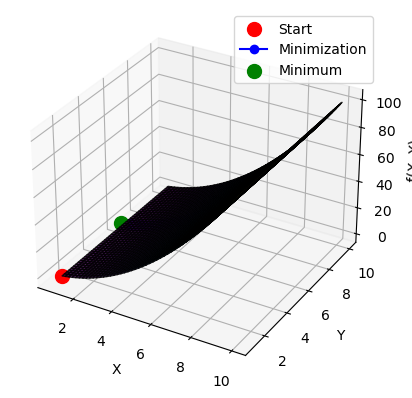

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function for minimization
def function(x, y):
    return x**2 - np.exp(-(x + 3*y))

# Partial derivatives of the function
def derivatives(x, y):
    df_dx = 2*x + 3 * np.exp(-(x + 3*y))
    df_dy = -3 * np.exp(-(x + 3*y))
    return np.array([df_dx, df_dy])

# Gradient descent method
def gradient_descent(learning_rate, iterations):
    x = np.random.uniform(1, 10)
    y = np.random.uniform(1, 10)
    history = []
    for _ in range(iterations):
        gradient = derivatives(x, y)
        x = x - learning_rate * gradient[0]
        y = y - learning_rate * gradient[1]
        history.append([x, y, function(x, y)])
    return np.array(history)

# Visualization of the function
x_vals = np.linspace(1, 10, 100)
y_vals = np.linspace(1, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = function(X, Y)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='k')

# Initial point
ax.scatter(1, 1, function(1, 1), color='red', marker='o', s=100, label='Start')

# Find the minimum
learning_rate = 0.01
iterations = 100
history = gradient_descent(learning_rate, iterations)

# Minimization trajectory
ax.plot(history[:, 0], history[:, 1], history[:, 2], color='blue', marker='o', label='Minimization')

# Final point - minimum
ax.scatter(history[-1, 0], history[-1, 1], history[-1, 2], color='green', marker='o', s=100, label='Minimum')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.legend()
plt.show()
